In [1]:
"""
GravMag: 3D forward modeling of total-field magnetic anomaly using triaxial
ellipsoids (model with induced and remanent magnetization)
"""
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from fatiando import mesher, gridder, utils
from fatiando.gravmag import ellipsoid_triaxial,ellipsoid_prolate,ellipsoid_oblate,sphere

C:\Users\diego_000\Documents\fatiando\fatiando\vis\mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
# The regional field
inten,inc, dec = 60000., 0., 90.
bounds = [-5000, 5000, -5000, 5000, 0, 5000]
# Create a regular grid at 100m height
shape = (200, 200)
area = bounds[:4]
xp, yp, zp = gridder.regular(area, shape, z=0)

## Triaxial

In [67]:
JRD_ang_l = []
tf_l =[]
k = 50.
a_l = np.linspace(50.1, 1000, 6) # SI

for a in a_l:        
    model = [mesher.EllipsoidTriaxial(0.,0.,1000., a, 50., 49.9, 10.,0.,0., 
                                     {'remanence': [10000, 0., 0.],
                                      'k': [k, k, k, 0., 90., 90.]})]

    # Calculate the anomaly for a given regional field
    tf_t,N1,N2,N3,JRD_ang = ellipsoid_triaxial.tf_c(xp,yp,zp,inten,inc,dec,model)
    tf_l.append(tf_t)
    JRD_ang_l.append(JRD_ang)

In [68]:
JRD_ang_l

[[14224.10257149125, array([ 0.]), array([ 89.7612439])],
 [17137.510279755981, array([ 0.]), array([ 45.46487196])],
 [32669.263202680748, array([ 0.]), array([ 27.09451421])],
 [53330.156134335964, array([ 0.]), array([ 20.2576366])],
 [76850.917685843349, array([ 0.]), array([ 17.06236973])],
 [101856.65623595193, array([ 0.]), array([ 15.30802837])]]

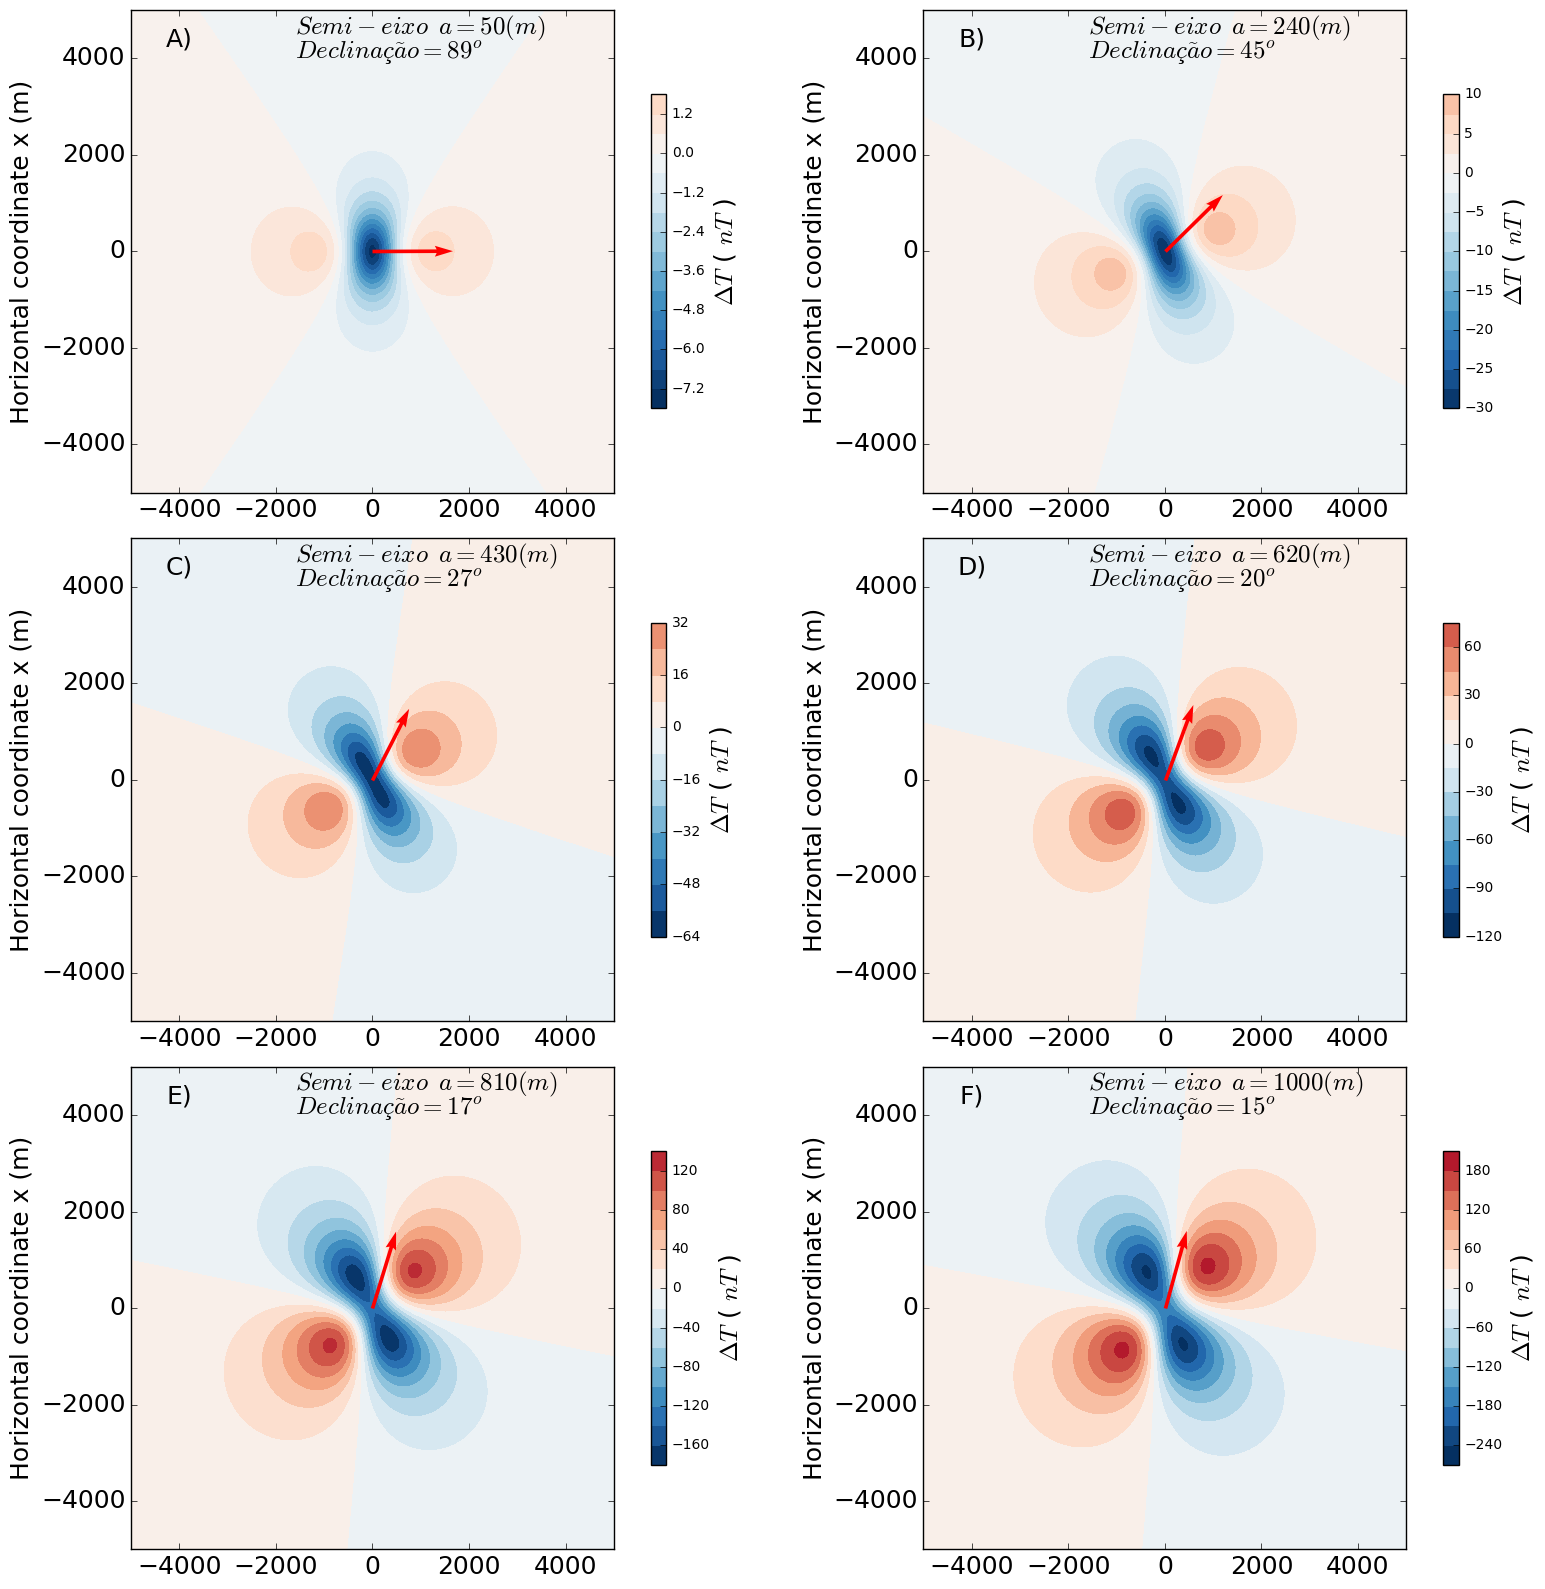

In [69]:
rangestf1 = np.max(np.abs([np.max(tf_l[0]), np.min(tf_l[0])]))
rangestf2 = np.max(np.abs([np.max(tf_l[1]), np.min(tf_l[1])]))
rangestf3 = np.max(np.abs([np.max(tf_l[2]), np.min(tf_l[2])]))
rangestf4 = np.max(np.abs([np.max(tf_l[3]), np.min(tf_l[3])]))
rangestf5 = np.max(np.abs([np.max(tf_l[4]), np.min(tf_l[4])]))
rangestf6 = np.max(np.abs([np.max(tf_l[5]), np.min(tf_l[5])]))


plt.figure(figsize=(16,16))

plt.subplot(3,2,1)
plt.title('A)', y=0.91, x=0.1, fontsize=18)
plt.axis('scaled')
plt.tricontourf(yp,xp,tf_l[0],15,
            vmin = -rangestf1, vmax = rangestf1,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.65)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=18)
plt.xlim(bounds[2],bounds[3])
plt.ylim(bounds[0],bounds[1])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.text(-1600,4500,'$Semi-eixo \,\,\, a = %d (m)$' % a_l[0],fontsize=18)
plt.text(-1600,4000,'$Declinac\c{\~a}o = %d^{o}$' % JRD_ang_l[0][2],fontsize=18)
#plt.xlabel('Horizontal coordinate y (m)', fontsize=18)
plt.ylabel('Horizontal coordinate x (m)', fontsize=18)
plt.quiver(0, 0, np.sin(np.deg2rad(JRD_ang_l[0][2])), np.cos(np.deg2rad(JRD_ang_l[0][2])), 
           color = 'r', units='xy', scale = 0.0006)

plt.subplot(3,2,2)
plt.title('B)', y=0.91, x=0.1, fontsize=18)
plt.axis('scaled')
plt.tricontourf(yp,xp,tf_l[1],15,
            vmin = -rangestf2, vmax = rangestf2,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.65)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=18)
plt.xlim(bounds[2],bounds[3])
plt.ylim(bounds[0],bounds[1])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.text(-1600,4500,'$Semi-eixo \,\,\, a = %d (m)$' % a_l[1],fontsize=18)
plt.text(-1600,4000,'$Declinac\c{\~a}o = %d^{o}$' % JRD_ang_l[1][2],fontsize=18)
#plt.xlabel('Horizontal coordinate y (m)', fontsize=18)
plt.ylabel('Horizontal coordinate x (m)', fontsize=18)
plt.quiver(0, 0, np.sin(np.deg2rad(JRD_ang_l[1][2])), np.cos(np.deg2rad(JRD_ang_l[1][2])), 
           color = 'r', units='xy', scale = 0.0006)

plt.subplot(3,2,3)
plt.title('C)', y=0.91, x=0.1, fontsize=18)
plt.axis('scaled')
plt.tricontourf(yp,xp,tf_l[2],15,
            vmin = -rangestf3, vmax = rangestf3,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.65)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=18)
plt.xlim(bounds[2],bounds[3])
plt.ylim(bounds[0],bounds[1])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.text(-1600,4500,'$Semi-eixo \,\,\, a = %d (m)$' % a_l[2],fontsize=18)
plt.text(-1600,4000,'$Declinac\c{\~a}o = %d^{o}$' % JRD_ang_l[2][2],fontsize=18)
#plt.xlabel('Horizontal coordinate y (m)', fontsize=18)
plt.ylabel('Horizontal coordinate x (m)', fontsize=18)
plt.quiver(0, 0, np.sin(np.deg2rad(JRD_ang_l[2][2])), np.cos(np.deg2rad(JRD_ang_l[2][2])), 
           color = 'r', units='xy', scale = 0.0006)

plt.subplot(3,2,4)
plt.title('D)', y=0.91, x=0.1, fontsize=18)
plt.axis('scaled')
plt.tricontourf(yp,xp,tf_l[3],15,
            vmin = -rangestf4, vmax = rangestf4,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.65)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=18)
plt.xlim(bounds[2],bounds[3])
plt.ylim(bounds[0],bounds[1])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.text(-1600,4500,'$Semi-eixo \,\,\, a = %d (m)$' % a_l[3],fontsize=18)
plt.text(-1600,4000,'$Declinac\c{\~a}o = %d^{o}$' % JRD_ang_l[3][2],fontsize=18)
#plt.xlabel('Horizontal coordinate y (m)', fontsize=18)
plt.ylabel('Horizontal coordinate x (m)', fontsize=18)
plt.quiver(0, 0, np.sin(np.deg2rad(JRD_ang_l[3][2])), np.cos(np.deg2rad(JRD_ang_l[3][2])), 
           color = 'r', units='xy', scale = 0.0006)

plt.subplot(3,2,5)
plt.title('E)', y=0.91, x=0.1, fontsize=18)
plt.axis('scaled')
plt.tricontourf(yp,xp,tf_l[4],15,
            vmin = -rangestf5, vmax = rangestf5,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.65)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=18)
plt.xlim(bounds[2],bounds[3])
plt.ylim(bounds[0],bounds[1])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.text(-1600,4500,'$Semi-eixo \,\,\, a = %d (m)$' % a_l[4],fontsize=18)
plt.text(-1600,4000,'$Declinac\c{\~a}o = %d^{o}$' % JRD_ang_l[4][2],fontsize=18)
#plt.xlabel('Horizontal coordinate y (m)', fontsize=18)
plt.ylabel('Horizontal coordinate x (m)', fontsize=18)
plt.quiver(0, 0, np.sin(np.deg2rad(JRD_ang_l[4][2])), np.cos(np.deg2rad(JRD_ang_l[4][2])), 
           color = 'r', units='xy', scale = 0.0006)

plt.subplot(3,2,6)
plt.title('F)', y=0.91, x=0.1, fontsize=18)
plt.axis('scaled')
plt.tricontourf(yp,xp,tf_l[5],15,
            vmin = -rangestf6, vmax = rangestf6,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.65)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=18)
plt.xlim(bounds[2],bounds[3])
plt.ylim(bounds[0],bounds[1])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.text(-1600,4500,'$Semi-eixo \,\,\, a = %d (m)$' % a_l[5],fontsize=18)
plt.text(-1600,4000,'$Declinac\c{\~a}o = %d^{o}$' % JRD_ang_l[5][2],fontsize=18)
#plt.xlabel('Horizontal coordinate y (m)', fontsize=18)
plt.ylabel('Horizontal coordinate x (m)', fontsize=18)
plt.quiver(0, 0, np.sin(np.deg2rad(JRD_ang_l[5][2])), np.cos(np.deg2rad(JRD_ang_l[5][2])), 
           color = 'r', units='xy', scale = 0.0006)

plt.tight_layout()
plt.savefig('..\\figures\\ellipsoid_shape_iso.pdf', dpi = 600, facecolor='w', bbox_inches='tight')